<a id='top'></a>

# CSCI3022 F20
# Homework 7: Hypothesis Testing
***

**Name**: Matt Ceriello

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import numpy as np
import math
import scipy.stats as stats
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 1: A One-Sample Hypothesis


You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

Null: 
$H_0: \lambda  = \frac{1}{10} mins$

Alternative: 
$H_{\alpha}:  \lambda > \frac{1}{10} mins$

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?


We can use the inverse of the cdf of exponential distribution to solve this problem(also known as the ppf).

We know exponential distribution has the form $$F(x) = 1 - e^{-\lambda *x}$$ 

Taking the inverse we get $$F^{-1}(y) = \frac{\ln(1-x)}{-\lambda}  $$

We can sub in $\lambda = \frac{1}{10}$

$$F^{-1}(y) = -10\ln(1-x)  $$

Since we are testing our hypothesis to an error of 5%, we can use the formula $1-P(X > c) = .05$

From this, we can use .95 for our x value.

$$F^{-1}(y) = -10\ln(1-.95)  $$
$$F^{-1}(y) = -10\ln(.05)  $$
$$F^{-1}(y) = 29.957  $$

So, after about **30 minutes**, you can reject the null hypothesis.

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)


We can find the power of the test by finding $\beta$ and calculating $1-\beta$

Taking the inverse we get $$F^{-1}(y) = \frac{\ln(1-x)}{-\lambda}  $$

We can sub in $\lambda = \frac{1}{60}$

$$F^{-1}(y) = -60\ln(1-x)  $$
$$F^{-1}(y) = -60\ln(1-.95)  $$
$$F^{-1}(y) = -60\ln(.05)  $$
$$F^{-1}(y) = 179.7  $$







**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?





<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 2: Choosing your error levels

Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**SOL:** This article talkes about the misconceptions of P-values in the world of science and medicine. The main thing that scientist are getting wrong about P-values is how the use them to make/support claims. They try to take the P-value itself and make a claim soley using the P-value. The problem witht that is that a P-value itself does not prove or claim anything, and if it doesn, it is not significant enough to do anything with it, according to Wasserstein. They suggest moving the P-value threshold down to .005, that way "statistical findings can move beyond the category of suggestive". I agree with the suggestions because in science and stattistics I belive there is black and white, and using statistics shouldn't leave you in this gray area. 

---

<a id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3 - Some Quick Hitters

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You're Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russell fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

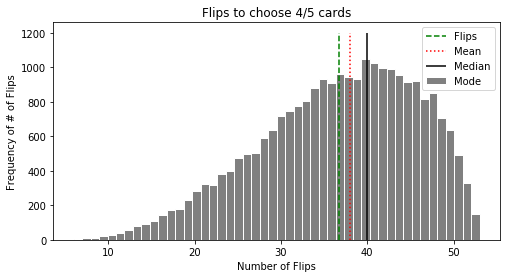

In [2]:
trials = []
def sim():
    done = False
    ck = 13
    d8 = 21
    h6 = 32
    j1 = 53
    j2 = 54
    count = 0
    flips = 0
    lst = []
    while (count < 4):
        card = random.randint(1,54)
        if card not in lst:
            flips += 1
            lst.append(card)
            if (card == 13 or card == 21 or card == 32 or card == 53 or card == 54):
                count += 1
        else:
            count += 0 
            
   
    return flips

total = 0
for x in range(25000):
    flip = sim()
    total += flip
    #print(flip)
    trials.append(flip)

    
    
    
avg = np.mean(trials)
med = np.median(trials)
mod = stats.mode(trials)
fig, ax = plt.subplots(figsize=(8,4))
ts = set(trials)
plt.hist(trials, color ='gray', edgecolor = 'white', bins = len(ts)) 
plt.vlines(avg,0,1200, colors = 'green', linestyle = 'dashed')
plt.vlines(med,0,1200, colors = 'red', linestyle = 'dotted')
plt.vlines(mod[0],0,1200, colors = 'black')
labl = ["Flips","Mean","Median","Mode"]
plt.legend(labl)
plt.xlabel("Number of Flips")
plt.ylabel("Frequency of # of Flips")
plt.title("Flips to choose 4/5 cards")
plt.show()
       

We say the data shown above is left skewed as the mean is left of the median.

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

In general, a 99% confidence interval is wider than a 95% confidence interval. One way to explain this to someone who isn't a statistician would be that the higher the percentage, the wider the interval will be. 99 > 95 so the 99% confidence interval is wider.

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by different "statistical measures". Compute a 95% confidence interval for the _mean_.


In [3]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
am = np.mean(smith)
print("Mean is:",am)
avg = np.mean(smith)
s = stats.sem(smith)
h = s * stats.t.ppf((1 + .95) / 2., 10)
print("Our CI: [",avg-h,",",avg+h,"]" )

Mean is: 0.29175636363636365
Our CI: [ 0.15617977118316947 , 0.4273329560895578 ]



***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


**SOL:** Lets first acknowledge that our Null hypothesis will be that the strength of the carbon is at or above the tolerance, making it safe. 
 
Type 1 errors are false positives so That would mean that our tests conclude that the strength is less than the tolerance when in reality its equal.
 
 We much prefer to have that than a Type 2 error, which means our tests conclude the strength is at tolerance which in reality its below, which isn't very good when your sending people 30,000 feet into the air...
 
So, we would much rather have a lower rate of Type 2 errors. 


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

From the given, we can calculate the $H_0$ and $H_1$

$H_0 = 7$
$H_1 > 7$

Using the given means and standard deviations, we can calculate our t-value:

$$t = \frac{(63.9-47.2)-7}{\sqrt{17.40+5.91}}$$

$$ =\frac{9.7}{4.8281} = 2.01$$

PVAL =P(t > 2.01)
We can now use the t-table to find our p value

P(t > 2.01) = .0235 < .025

Since our pval is less than our significance level, we have enough evidence to reject H0 and support H1.


---

<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4 - Maybe we actually do some tests now?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

Coffee + Nap CI = [432.839 , 469.761]

Coffee CI = [471.282 , 517.118]

Nap CI = [466.642 , 518.958]

From our results, we can say coffee and naps separately proved better for reaction time then the two combined. We used the t-distribution because we do not know the population standard deviation.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [4]:
# coffee-nap versus coffee

In [5]:
# coffee-nap versus nap

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.